In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from numpy.polynomial.polynomial import polyfit

In [2]:
df = pd.read_csv('.././creditcard.csv', sep=',')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


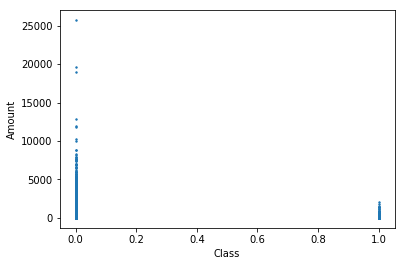

In [4]:
fig = df.plot.scatter('Class', 'Amount', s=2)

In [5]:
df_fraud = df[ df['Class'] == 1 ]
df_fraud.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,492.0,80746.806911,47835.365138,406.000000,41241.500000,75568.500000,128483.000000,170348.000000
V1,492.0,-4.771948,6.783687,-30.552380,-6.036063,-2.342497,-0.419200,2.132386
V2,492.0,3.623778,4.291216,-8.402154,1.188226,2.717869,4.971257,22.057729
V3,492.0,-7.033281,7.110937,-31.103685,-8.643489,-5.075257,-2.276185,2.250210
V4,492.0,4.542029,2.873318,-1.313275,2.373050,4.177147,6.348729,12.114672
V5,492.0,-3.151225,5.372468,-22.105532,-4.792835,-1.522962,0.214562,11.095089
V6,492.0,-1.397737,1.858124,-6.406267,-2.501511,-1.424616,-0.413216,6.474115
V7,492.0,-5.568731,7.206773,-43.557242,-7.965295,-3.034402,-0.945954,5.802537
V8,492.0,0.570636,6.797831,-41.044261,-0.195336,0.621508,1.764879,20.007208
V9,492.0,-2.581123,2.500896,-13.434066,-3.872383,-2.208768,-0.787850,3.353525


In [6]:
df_clean = df[ df['Class'] == 0 ]
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284315.0,94838.202258,47484.015786,0.000000,54230.000000,84711.000000,139333.000000,172792.000000
V1,284315.0,0.008258,1.929814,-56.407510,-0.917544,0.020023,1.316218,2.454930
V2,284315.0,-0.006271,1.636146,-72.715728,-0.599473,0.064070,0.800446,18.902453
V3,284315.0,0.012171,1.459429,-48.325589,-0.884541,0.182158,1.028372,9.382558
V4,284315.0,-0.007860,1.399333,-5.683171,-0.850077,-0.022405,0.737624,16.875344
V5,284315.0,0.005453,1.356952,-113.743307,-0.689398,-0.053457,0.612181,34.801666
V6,284315.0,0.002419,1.329913,-26.160506,-0.766847,-0.273123,0.399619,73.301626
V7,284315.0,0.009637,1.178812,-31.764946,-0.551442,0.041138,0.571019,120.589494
V8,284315.0,-0.000987,1.161283,-73.216718,-0.208633,0.022041,0.326200,18.709255
V9,284315.0,0.004467,1.089372,-6.290730,-0.640412,-0.049964,0.598230,15.594995


In [7]:
for row in zip(df.columns, df_clean.mean(), df_fraud.mean()):
    print(row)

('Time', 94838.20225805884, 80746.80691056911)
('V1', 0.008257737485566125, -4.7719484414790845)
('V2', -0.006270857415806876, 3.6237781019822792)
('V3', 0.012170917031839727, -7.03328104859655)
('V4', -0.007859867820464295, 4.542029104423097)
('V5', 0.005453115888644884, -3.151224885936003)
('V6', 0.002418748436107688, -1.39773671059235)
('V7', 0.009636549929483582, -5.568731083742738)
('V8', -0.000987471151665606, 0.570635895296237)
('V9', 0.004466568691335589, -2.5811229217029954)
('V10', 0.009823703892289393, -5.676882870194374)
('V11', -0.006576104223821536, 3.8001729113746077)
('V12', 0.010831723172554403, -6.259393036190128)
('V13', 0.0001891994372621374, -0.10933381708278415)
('V14', 0.01206439218437788, -6.971722894107605)
('V15', 0.0001608108734390509, -0.09292874691208504)
('V16', 0.007164072539099407, -4.13994569909281)
('V17', 0.011535063252130157, -6.665836399449661)
('V18', 0.003887180071097618, -2.246308133971404)
('V19', -0.0011778639090785682, 0.6806593034754284)
('V2

C:\Users\lucan\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


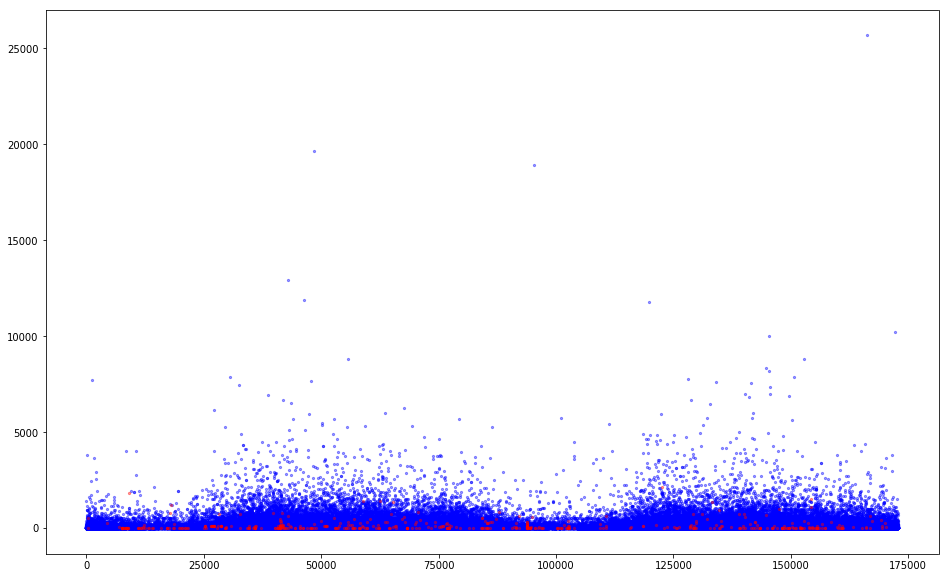

In [8]:
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(111)
ax1.scatter(df_clean['Time'], df_clean['Amount'], s=5, c='b', alpha=.4)
ax1.scatter(df_fraud['Time'], df_fraud['Amount'], s=5, c='r', alpha=.4)
fig.show()

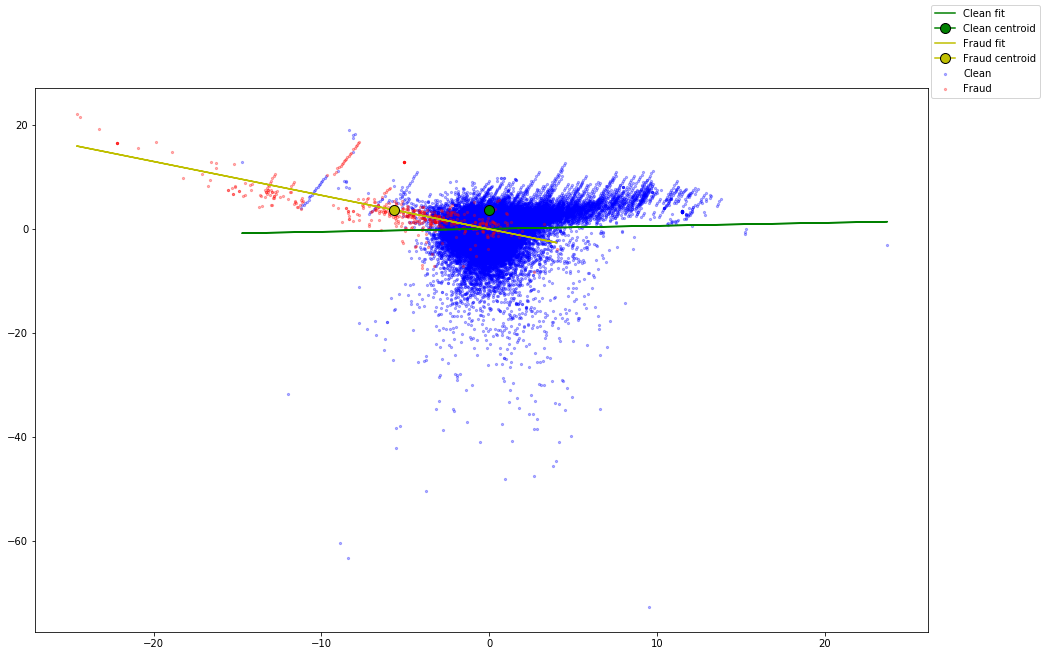

In [9]:
x_col, y_col = 'V10', 'V2'

fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(111)

ax1.scatter(df_clean[x_col], df_clean[y_col], s=5, c='b', alpha=.3, label='Clean')
b, a = polyfit(df_clean[x_col], df_clean[y_col], 1)
ax1.plot(df_clean[x_col], a * df_clean[x_col] + b, c='g', label='Clean fit')
x, y = [df_clean[x_col].mean()], [df_fraud[y_col].mean()]
ax1.plot(x, y, c='g', mec='black', ms=10, marker='o', label='Clean centroid')

ax1.scatter(df_fraud[x_col], df_fraud[y_col], s=5, c='r', alpha=.3, label='Fraud')
b, a = polyfit(df_fraud[x_col], df_fraud[y_col], 1)
ax1.plot(df_fraud[x_col], a * df_fraud[x_col] + b, c='y', label='Fraud fit')
x, y = [df_fraud[x_col].mean()], [df_fraud[y_col].mean()]
ax1.plot(x, y, c='y', mec='black', ms=10, marker='o', label='Fraud centroid')

fig.legend()
fig.show()